In [ ]:
import nbpresent
nbpresent.__version__

In [99]:
import nbpresent
nbpresent.__version__

'3.0.2'

# Effect of Reservoir Filling and Volume on Seimic Rates and Magnitudes

## Hyptoheses:
* Reservoir filling will cause an increase in seismic rates
* Reservoir filling will cause an increase in seismic magnitude
* Reservoir filling will only effect seismicity beyond a volume threshold
* Reservoir filling will have no effect on seismic rates or magnidue



## Data sources
* Earthqueake cataloge:http://earthquake.usgs.gov/earthquakes/search/
* Summary of selected characteristics of large reservoirs https://water.usgs.gov/GIS/metadata/usgswrd/XML/reservoir.xml#stdorder






## Team members 

* Sam Alter
* Steven Dibb
* Vishaal Singh
* Adam Wade

In [101]:
%matplotlib inline

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
Dams_List = pd.read_csv('../data/Cal_Dams.csv')
Dams_List.head(n=5)

,FID,AREA,PERIMETER,RES_,RES_ID,FIPS,STATE,NUM,DAMNAME,RESNAME,...,LATDD,FIPSST,FIPSCNTY,STATENUM,HUC2,HUC4,HUC6,POLYGONID,SCALE,ANGLE
0,0,0.0,0.0,759,231,6093,CA,50,COPCO NO 1 91-,COPCO LAKE,...,41.979999,6,93,CA 50,18,1801,180102,759,1.0,0.0
1,1,0.0,0.0,763,147,6093,CA,255,IRON GATE,IRON GATE,...,41.933300,6,93,CA255,18,1801,180102,763,1.0,0.0
2,2,0.0,0.0,800,247,6049,CA,43,CLEAR LAKE,CLEAR LAKE,...,41.926701,6,49,CA 43,18,1801,180102,800,1.0,0.0
3,3,0.0,0.0,825,344,6093,CA,208,SHASTA RIVER 60-000,LAKE SHASTINA,...,41.540001,6,93,CA208,18,1801,180102,825,1.0,0.0
4,4,0.0,0.0,853,292,6049,CA,175,POISON SPRINGS 1113-,FEE RESERVOIR,...,41.818298,6,49,CA175,18,1808,180800,853,1.0,0.0


In [104]:
background = '../Maps/GRAY_50M_SR_OB.tif'

In [105]:
from mpl_toolkits.basemap import Basemap
import numpy as np


In [106]:
memory_issue = False

if memory_issue:
    scale=0.3
else:
    scale=None

In [107]:
map_size = (17,11)

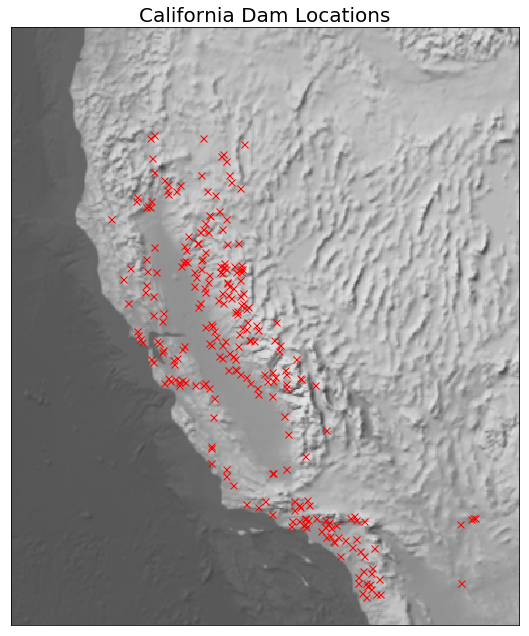

In [100]:
import warnings
warnings.filterwarnings('ignore')

f = plt.figure(figsize=map_size)
m = Basemap(projection='merc', lat_0=33.5, lon_0=137.25,
    resolution = 'l', area_thresh = 1000.0,
   llcrnrlon=-126, llcrnrlat=32,
    urcrnrlon=-113, urcrnrlat=44)

lats = Dams_List['LATDD'].values
lons = Dams_List['LONDD'].values

x, y = m(lons,lats)
m.plot(x, y, 'x', ms=7, mec='r', mfc='None', mew=1.0)

m.warpimage(image=background, scale=scale)
plt.title('California Dam Locations',fontsize=20)
plt.show()